# TEWA 1 tutorial

## simulating  and fitting linear regression models

## single predictor and multiple predictors

## calculating model predicition error


##  resampling for regression uncertainty






In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats, linalg

## simulating data based on a regression model

equation for the predicted line:
Ypred=B<sub>0</sub>+B<sub>1</sub>*X

equation for the data simulation:
Y=B<sub>0</sub>+B<sub>1</sub>*X+Error

the example from the lecture, we are trying to predict the price of apartment, based on the age of the house
 below, we create some data X

 houses, ages between 0 and 200 years

In [ ]:
n = 150  # number of data points
age = np.random.randint(0, 200, n)

for the above data, simulate apartment prices for the 150 houses, with a linear regression model, we know that
1. a brand new apartment costs  500 000 €
2. the error in the model should have SD of 100 000 €
3. for each additional year, the price is lower with 1000 €


In [ ]:
b0 = 500000
b1 = -1000
sd = 100000
price = b0 + b1 * age + np.random.normal(0, sd, n)

1. visualize the above data with a scatter plot
2. add labels for the axes

Text(0, 0.5, 'Price €')

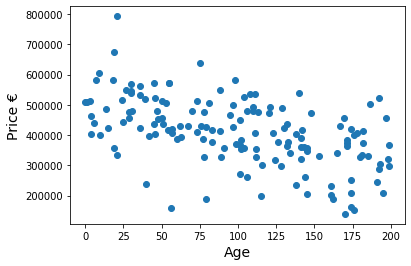

In [ ]:
plt.scatter(age, price)
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)

## fitting a regression line

now we can try to fit a least squares regression  to tha above data, using lingalg.lstsq()

as discussed in the lecture, this requires adding a column of ones to the predictor variable  (the reason for this is that regression models, are calcualted as a matrix- vector multiplication)

In [ ]:
xx = np.column_stack((np.ones(n), age))
print(np.shape(xx))
reg__result = linalg.lstsq(xx, price)

(150, 2)


In [ ]:
# XX2=np.column_stack((Age,np.ones(N)))
# Reg_Result2=linalg.lstsq(XX2,Price)

In [ ]:
print(reg__result2[0])

[ -1070.24848946 513753.29506539]


In [ ]:
xx[0:10, :]

array([[  1., 161.],
       [  1., 110.],
       [  1.,  46.],
       [  1., 132.],
       [  1.,  48.],
       [  1., 169.],
       [  1., 141.],
       [  1., 171.],
       [  1., 180.],
       [  1.,  46.]])

In [ ]:
?linalg.lstsq

the first argument that is returned by lstsq is the most important one for us now, print it out (it should contain two values)
the 2nd argument is the residual (error), print it out as well

In [ ]:
print(reg__result[0])
# print(reg__result[1])

# ?linalg.lstsq

[513753.29506539  -1070.24848946]


In [ ]:
reg__result[0][1]

-1070.2484894633553

you can hopefully observe that we got similar values to what we created the data with, but not exactly the same


## visualizing the regression line
1. use again the scatter plot to visualize the age to price data, as before,
2. add the regression line (red), based on the result of the lstsq()
3.

In [ ]:
xs = np.array([0, 200])
ys = reg__result[0][0] + reg__result[0][1] * xs

Text(0, 0.5, 'Price €')

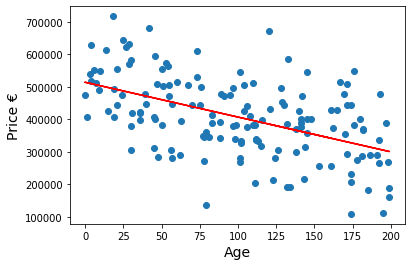

In [ ]:
plt.scatter(age, price)
plt.plot(age, reg__result[0][0] + age * reg__result[0][1], color="r")
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)

Text(0, 0.5, 'Price €')

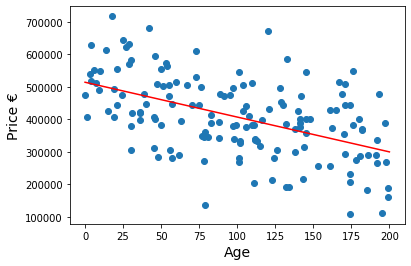

In [ ]:
plt.scatter(age, price)
plt.plot(xs, ys, color="r")
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)

In [ ]:
residuals = price - (reg__result[0][0] + age * reg__result[0][1])

## calculate the residuals and the total error for the fitted model

 use the c= argument, of scatter, to color dots, based on the residual error
this can be done, using plt.plot, but you will need some care how you include the values in X (as they are in random order)

you can also try it with the  squared error!

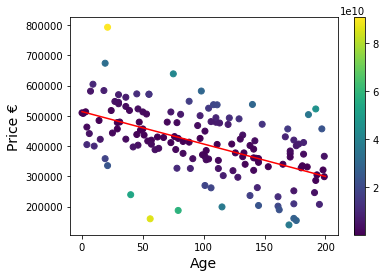

In [ ]:
plt.scatter(age, price, c=residuals**2)
plt.plot(xs, ys, color="r")
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)

plt.colorbar()

In [ ]:
plt.scatter(age, price, c=residuals)
plt.plot(xs, ys, color="r")
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)

plt.colorbar()

compare what you calculated with the output of linalg.lstsq

In [ ]:
print(reg__result[1])

print(np.sum((price - Predprice) ** 2))

1690521164543.6414
1690521164543.6414


### advanced 1
## Bootstrapping for a confidence interval in the regression line
resample the data with replacment and visualize the obtained confidence interval for the regression line



Text(0, 0.5, 'Price')

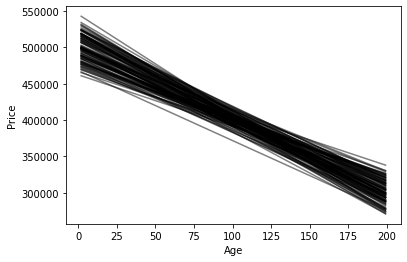

In [ ]:
nsim = 100
# YOUR CODE

### advanced 2

### hypothesis test with randomization

is the relationship between age and price different from chance?
use randomization to simulate 1000 slope under the null hypothesis of no relationship


## Simulating data with a regression model with two predictors
of course our model of apartment prices is limited, since there are many other factors influencing the price,
probably the most important one is the size of the aparment.
1. make an additonal predictor, the size, that ranges from 20 to 200 m<sup>2</sup> with uniform random values
2. we know that for each additonal m<sup>2</sup>, the price increases with 2000 €
3. simulate a new price data-set, that has 2 predictors, age as above, and size as defined here

4. the error should stay the same, but it makes sense to have a lower intercept value of 300 000 €  (why?)


In [ ]:
n = 150
age = np.random.randint(0, 200, n)
sqm2 = np.random.randint(20, 200, n)
b1 = -1000
b2 = 2000
error_sd = 15000
price = 300000 + b1 * age + b2 * sqm2 + np.random.normal(0, error_sd, n)

visualize the data-set ,
1. make a figure with 2 subplots horizontally arrarnged (1 for each predictor), scatter plots again
2. make a new figure, with age on the x axis, and the size of the dots in the scatter plot should be proportional to the size of the aparment (parameter s of scatter)



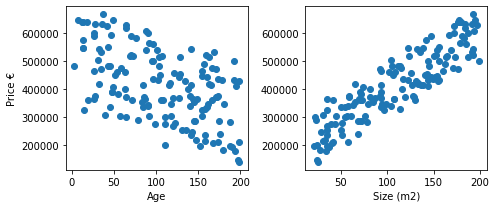

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(7, 3))
ax[0].scatter(age, price)
ax[0].set_xlabel("age")
ax[0].set_ylabel("price €")

ax[1].scatter(sqm2, price)
ax[1].set_xlabel("Size (m2)")

plt.tight_layout()
# your code
# your code

showing both factors on single figure  (size of dots as a new dimension, s= argument)

Text(0, 0.5, 'Price €')

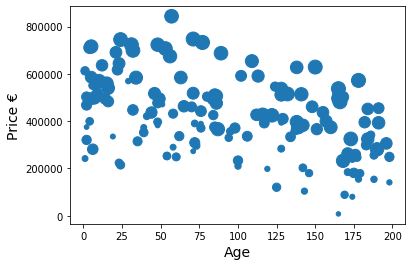

In [ ]:
plt.figure()
plt.scatter(age, price, s=sqm2)
plt.xlabel("age", fontsize=14)
plt.ylabel("price €", fontsize=14)


### fit a linear regression model with intercept and the two predictors using scipy.linalg to the above data

#### calculate the error of the model






In [ ]:
xx = np.column_stack((np.ones(n), age, sqm2))
print(np.shape(xx))
linalg.lstsq(xx, price)[0]

(150, 3)


array([300714.1762268 ,   -977.19506011,   1984.67688862])

observe the fitted coefficients B0,B1,B2

In [ ]:
linalg.lstsq(xx, price)[0]

array([300714.1762268 ,   -977.19506011,   1984.67688862])

fit 2 regressions to the above data

1. only intercept and age as predictors
2. only intercept and price as predictors

compar the obtained errors and weigths(slopes) with the one obtained with using two predictors.


In [ ]:
xx1 = np.column_stack((np.ones(n), age))

print(
    "age only ",
    np.round(linalg.lstsq(xx1, price)[0], 1),
    "error",
    np.round(np.sqrt(linalg.lstsq(xx1, price)[1]), 1),
)

xx2 = np.column_stack((np.ones(n), sqm2))
print(
    "Size only ",
    np.round(linalg.lstsq(xx2, price)[0], 1),
    "error",
    np.round(np.sqrt(linalg.lstsq(xx2, price)[1]), 1),
)

print(
    "Both ",
    np.round(linalg.lstsq(xx, price)[0], 1),
    "error",
    np.round(np.sqrt(linalg.lstsq(xx, price)[1]), 1),
)

Age only  [544915.4  -1241.1] error 1279673.2
Size only  [181485.3   2128.2] error 682741.0
Both  [300714.2   -977.2   1984.7] error 194590.1


109.63846410865564

## homework 1.

###  write a  function to perform the above calculation MyMultRegr()
this function should take 3 inputs in the following order 1. predictor1 (age), 2. predictor (size),  3. outcome variable (price)

your function has to
1.  create a predictor matrix (as above), starting with a column of ones, and the two predictors. (3 columns in total)
2. use lstsq () to fit the regression model, as above
3. the function should return 2 outputs, the 1st one is an array containing the 3 fitted regression parameters (1st output argument of lstsq()) , 2nd output should be the residual error (2nd output argument of lstsq()),

!! make sure that your function works for inputs of any size (this is important when you add the column of ones), (but you can assume that all of the 3 input vectors have the same length (otherwise the analysis does not make sense)





In [ ]:
# YOUR CODE
# YOUR CODE

## homework 2.

### standardized predictors

standardize (z-score) your predictors by subtracting the mean and dividing by the standard deviaton.

fit a regression with both the single predictor and the two predictor models and compare error and beta weigths for fitting the model to standardized and non-standardized data-sets


use the MyMultRegr() function in this solution



In [ ]:
# YOUR CODE
# YOUR CODE

## homework 3

car price simulation

a new car costs 30 000 euros on average


simulate 200 car prices from the last 70 years, with the assumption that while as cars get older they are cheaper, however very old cars, have a vintage value, that is eventually if the are old enough they could worth more than a new car.


use a standard devation of 10 000 euros



hint: use a linear model for the simualtion with a two predictors, and linear and a quadratic term  


test different values for the two slopes, simulate data, until you manage to simulate realistic car prices, that satisfy the above criteria..

e fitted  models





In [ ]:
# YOUR CODE
# YOUR CODE
# YOUR CODE

once you found good values for this simulation, make a nice visualization of the simulated data

In [ ]:
# YOUR CODE
# YOUR CODE
# YOUR CODE


once, the data simulation is ready, fit 3 regression models to the simulated data:
1. intercept + linear predictor age
2. intercept + linear predictor + quadratic predictor x<sup>2</sup>
3.  intercept + linear predictor + quadratic predictor x<sup>2</sup> + cubic predicor x<sup>3</sup>

print  the obtained residual error for the three models and visualize the model predictions

In [ ]:
# YOUR CODE
# YOUR CODE
# YOUR CODE

## this is bonus task- no need to submit
## reliability of regression analysis
since we created the data, we can see how close are the true values to the 'generative' model
next task is to systematically investigate this relationship
you will have to manipualte the number of datapoints, and the error in the model, and analyze the difference between the data generating and the fitted regression parameters



this task is somewhat analogous to the t-test simulation task

In [ ]:
# YOUR CODE
# YOUR CODE
# YOUR CODE